In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
path = "C:\\Users\\A25563592\\Desktop\\DataAnalysis\\03_Analysis\\msmx-github\\4-models\\1-LinearRegression-for-DeepLearning\\data_1d.csv"
ColNames = ['X','Y']
df = pd.read_csv(filepath_or_buffer=path,header=None,names=ColNames)

In [3]:
df.dtypes

X    float64
Y    float64
dtype: object

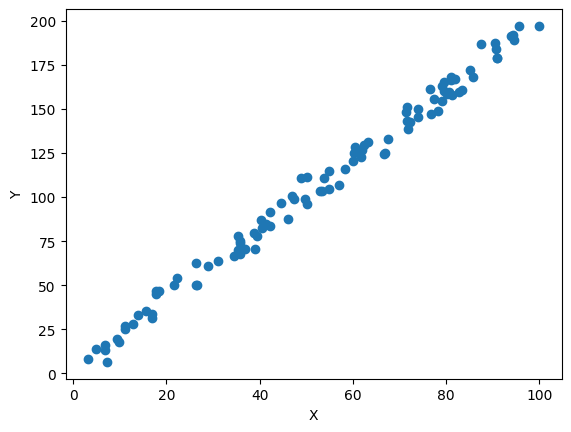

In [4]:
plt.scatter(df['X'],df['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
# y_hat = ax + b

X = df['X']
Y = df['Y']

a = (X.dot(Y) - Y.mean()*X.sum())/(X.dot(X)-X.mean()*X.sum())
b = (Y.mean()*X.dot(X) - X.mean()*X.dot(Y))/(X.dot(X)-X.mean()*X.sum())

Y_hat = a*X + b

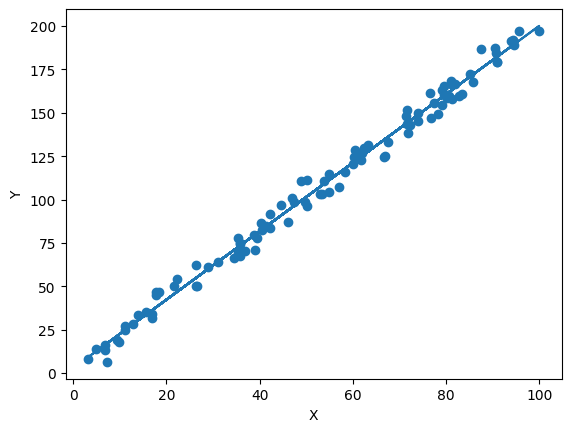

In [6]:
plt.scatter(df['X'],df['Y'])
plt.plot(X,Y_hat)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
# R_squared

#R_squared = 1- Residual_y_hat / Residual_y_total

Residual_y_hat = (Y - Y_hat).dot((Y - Y_hat))

Residual_y_total = (Y - Y.mean()).dot((Y - Y.mean()))

R_squared = 1- Residual_y_hat / Residual_y_total


# R_squared ≒ 1：Residual_y_hat almost be zero, forecast ≒ actual

# R_squared ≒ 0：y_hat is not better than y_mean()



In [8]:
R_squared

0.9911838202977805

In [18]:
path = "C:\\Users\\A25563592\\Desktop\\DataAnalysis\\03_Analysis\\msmx-github\\4-models\\1-LinearRegression-for-DeepLearning\\moore.csv"
ColNames = ['brand','transistor_cnt','year','vendor','chip_nm2','chip_nm1']
moore = pd.read_csv(filepath_or_buffer=path,delimiter='\t',header=None,names=ColNames)

#Transistor counts are in 2nd column, year is in 3rd column


In [78]:
non_decimal = re.compile(r'[^\d]+')
#r：表示原始字符串(raw string)，在 Python 中使用原始字符串可以避免对特殊字符进行转义，简化了正则表达式的书写。
#[^\d]：表示匹配除数字以外的任意字符。
    ## 其中，\d 是正则表达式中表示数字的特殊字符，
    ## ^ 表示取反，所以 [^\d] 表示除数字以外的任意字符。
#+：表示匹配前面的字符（或字符集）一次或多次，即连续出现的非数字字符。

y = []

for i in moore['transistor_cnt']:
    i_modify = int(non_decimal.sub('',i.split('[')[0]))
    y.append(i_modify)

y = np.array(y)

y_mdf = np.log(y)

In [73]:
non_decimal = re.compile(r'[^\d]+')

x = []

for i in moore['year']:
    i_modify = int(non_decimal.sub('',i.split('[')[0]))
    x.append(i_modify)

x = np.array(x)

x_mdf = x - (x.min() -1)

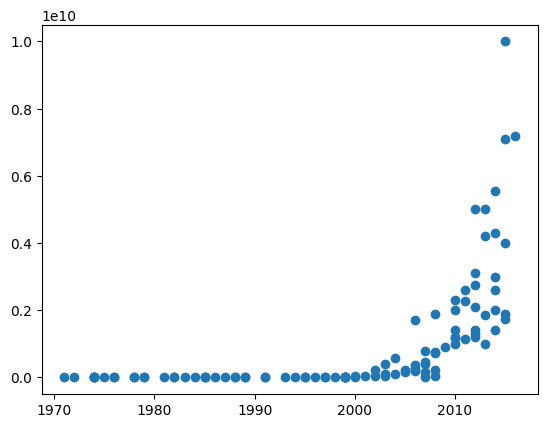

In [77]:
plt.scatter(x,y)

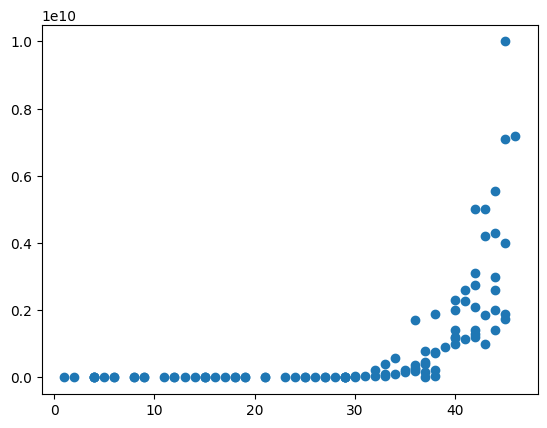

In [74]:
plt.scatter(x_mdf,y)

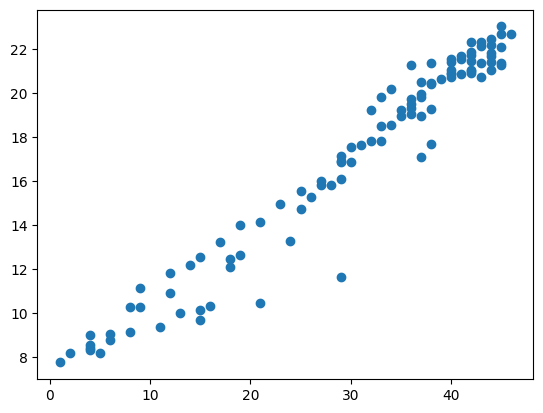

In [79]:
plt.scatter(x_mdf,y_mdf)

In [80]:
# y_hat = ax + b

X = x_mdf
Y = y_mdf

a = (X.dot(Y) - Y.mean()*X.sum())/(X.dot(X)-X.mean()*X.sum())
b = (Y.mean()*X.dot(X) - X.mean()*X.dot(Y))/(X.dot(X)-X.mean()*X.sum())

Y_hat = a*X + b

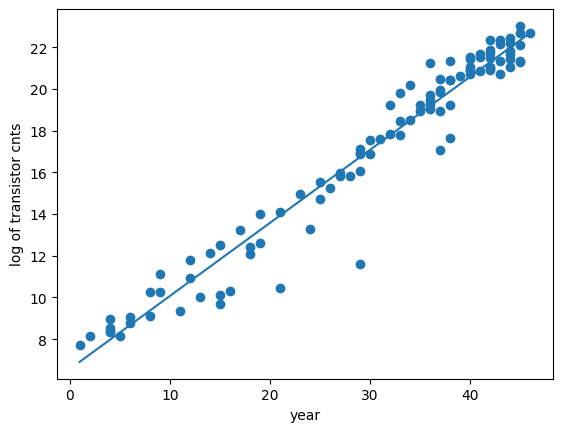

In [82]:
plt.scatter(x_mdf,y_mdf)
plt.plot(X,Y_hat)
plt.xlabel('year')
plt.ylabel('log of transistor cnts')
plt.show()

In [84]:
# R_squared

#R_squared = 1- Residual_y_hat / Residual_y_total

Residual_y_hat = (Y - Y_hat).dot((Y - Y_hat))

Residual_y_total = (Y - Y.mean()).dot((Y - Y.mean()))

R_squared = 1- Residual_y_hat / Residual_y_total


# R_squared ≒ 1：Residual_y_hat almost be zero, forecast ≒ actual

# R_squared ≒ 0：y_hat is not better than y_mean()

R_squared

0.9529442852285762